In [9]:
import pandas as pd

df = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')

df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [7]:
df['ADDRESSLINE2'].isnull().sum()  #Combien de lignes ont ADDRESSLINE2 manquant ?

2521

In [36]:
df['PRICEEACH'].median()
df.groupby('PRODUCTLINE')['PRICEEACH'].transform(lambda x : x.where(x == 100,x.median()))   #Remplacer les PRICEEACH  = 100 par la médiane par PRODUCTLINE

0        93.90
1        93.90
2        93.90
3        93.90
4       100.00
         ...  
2818    100.00
2819    100.00
2820    100.00
2821     87.61
2822     87.61
Name: PRICEEACH, Length: 2823, dtype: float64

In [41]:
#Détectez les commandes avec QUANTITYORDERED > 3 écarts-types de la moyenne.
moyenne_q = df['QUANTITYORDERED'].mean()
ec_q = df['QUANTITYORDERED'].std()
df[df['QUANTITYORDERED'] > moyenne_q + 3*ec_q]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
25,10417,66,100.00,2,7516.08,5/13/2005 0:00,Disputed,2,5,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Large
104,10403,66,100.00,9,11886.60,4/8/2005 0:00,Shipped,2,4,2005,...,Berkeley Gardens 12 Brewery,NaN,Liverpool,NaN,WX1 6LT,UK,EMEA,Devon,Elizabeth,Large
264,10403,66,100.00,6,8648.64,4/8/2005 0:00,Shipped,2,4,2005,...,Berkeley Gardens 12 Brewery,NaN,Liverpool,NaN,WX1 6LT,UK,EMEA,Devon,Elizabeth,Large
418,10405,97,93.28,5,9048.16,4/14/2005 0:00,Shipped,2,4,2005,...,"24, place Kluber",NaN,Strasbourg,NaN,67000,France,EMEA,Citeaux,Frederique,Large
598,10407,76,100.00,2,14082.80,4/22/2005 0:00,On Hold,2,4,2005,...,3086 Ingle Ln.,NaN,San Jose,CA,94217,USA,NaN,Frick,Sue,Large
1188,10406,65,100.00,1,10468.90,4/15/2005 0:00,Disputed,2,4,2005,...,Vinb'ltet 34,NaN,Kobenhavn,NaN,1734,Denmark,EMEA,Petersen,Jytte,Large
1288,10420,66,92.95,6,6134.70,5/29/2005 0:00,In Process,2,5,2005,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium
1413,10407,66,66.99,4,4421.34,4/22/2005 0:00,On Hold,2,4,2005,...,3086 Ingle Ln.,NaN,San Jose,CA,94217,USA,NaN,Frick,Sue,Medium
1666,10412,70,100.00,10,8498.00,5/3/2005 0:00,Shipped,2,5,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Large
1714,10407,76,94.50,6,7182.00,4/22/2005 0:00,On Hold,2,4,2005,...,3086 Ingle Ln.,NaN,San Jose,CA,94217,USA,NaN,Frick,Sue,Large


In [43]:
df.head(5)
df.groupby('COUNTRY')['SALES'].sum()

COUNTRY
Australia       630623.10
Austria         202062.53
Belgium         108412.62
Canada          224078.56
Denmark         245637.15
Finland         329581.91
France         1110916.52
Germany         220472.09
Ireland          57756.43
Italy           374674.31
Japan           188167.81
Norway          307463.70
Philippines      94015.73
Singapore       288488.41
Spain          1215686.92
Sweden          210014.21
Switzerland     117713.56
UK              478880.46
USA            3627982.83
Name: SALES, dtype: float64

In [50]:
#Top 5 des pays par SALES total.
df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(5)   #solution 1
df.groupby('COUNTRY')['SALES'].sum().nlargest(5)  #solution 2

COUNTRY
USA          3627982.83
Spain        1215686.92
France       1110916.52
Australia     630623.10
UK            478880.46
Name: SALES, dtype: float64

<Axes: xlabel='COUNTRY'>

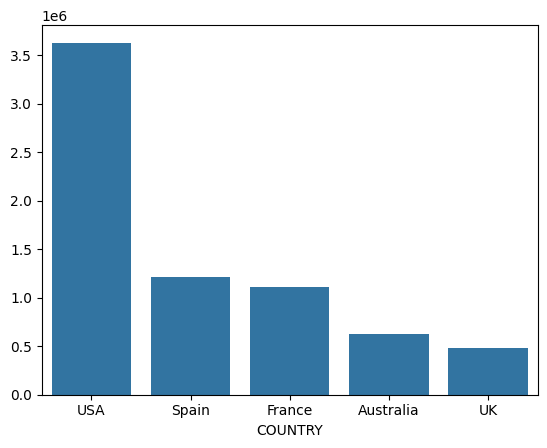

In [53]:
import seaborn as sns
sales_by_pays = df.groupby('COUNTRY')['SALES'].sum().nlargest(5)  #solution 2
sns.barplot(x=sales_by_pays.index,y=sales_by_pays.values)

<Axes: >

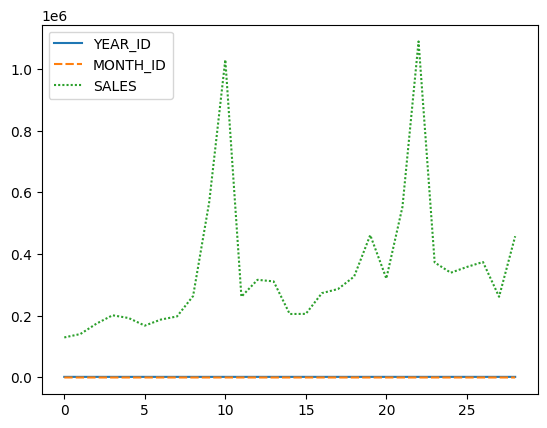

In [70]:
#Agrégation des ventes (SALES) par mois (YEAR_ID, MONTH_ID)
data_monthly = df.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()  
sns.lineplot(data=data_monthly)

In [103]:
'''
 Calculez pour chaque client :

    Récence : Jours depuis dernière commande.

    Fréquence : Nombre de commandes.

    Montant : CA total (SALES).    
'''
from datetime import datetime
df.groupby('CUSTOMERNAME').agg(
    {
        'ORDERDATE' : lambda x: (datetime.now() - x.max()).days,
        'SALES' : 'sum',
        'ORDERNUMBER'  :'count'
    }
).rename(columns = {'ORDERDATE' : 'Récence','ORDERNUMBER' : 'Fréquence','SALES' : 'Montant'})

,Récence,Montant,Fréquence
CUSTOMERNAME,,,
"AV Stores, Co.",7566,157807.81,51
Alpha Cognac,7435,70488.44,20
Amica Models & Co.,7635,94117.26,26
"Anna's Decorations, Ltd",7454,153996.13,46
Atelier graphique,7558,24179.96,7
...,...,...,...
"Vida Sport, Ltd",7645,117713.56,31
Vitachrome Inc.,7578,88041.26,25
"Volvo Model Replicas, Co",7564,75754.88,19


In [109]:
#Segmentez les clients avec pd.qcut (ex: "Champions", "À risque").
rfm = df.groupby('CUSTOMERNAME').agg(
    {
        'ORDERDATE' : lambda x: (datetime.now() - x.max()).days,
        'SALES' : 'sum',
        'ORDERNUMBER'  :'count'
    }
).rename(columns = {'ORDERDATE' : 'Récence','ORDERNUMBER' : 'Fréquence','SALES' : 'Montant'})

rfm['Récence_seg'] = pd.qcut(rfm['Récence'],q=5,labels=False)
rfm['Montant_seg'] = pd.qcut(rfm['Montant'],q=5,labels=False)
rfm['Fréquence_seg'] = pd.qcut(rfm['Fréquence'],q=5,labels=False)

print(rfm)

                             Récence    Montant  Fréquence  Récence_seg  \
CUSTOMERNAME                                                              
AV Stores, Co.                  7566  157807.81         51            2   
Alpha Cognac                    7435   70488.44         20            1   
Amica Models & Co.              7635   94117.26         26            4   
Anna's Decorations, Ltd         7454  153996.13         46            1   
Atelier graphique               7558   24179.96          7            2   
...                              ...        ...        ...          ...   
Vida Sport, Ltd                 7645  117713.56         31            4   
Vitachrome Inc.                 7578   88041.26         25            3   
Volvo Model Replicas, Co        7564   75754.88         19            2   
West Coast Collectables Co.     7859   46084.64         13            4   
giftsbymail.co.uk               7582   78240.84         26            3   

                        